In [15]:
import ipywidgets as widgets
import pandas as pd
import numpy as np

import pymove as pm
from pymove.visualization import folium as f, matplotlib as mpl
from pymove.utils import visual

In [38]:
#url = "https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv"
url = "international-visitors-london-raw.csv"
df_london = pd.read_csv(url, encoding= 'unicode_escape')

In [39]:
df_london

,year,quarter,market,dur_stay,mode,purpose,area,Latitude,Longitude,Nights (000s),sample,Date,Time
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5,18510625.0,0.0
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19,18510625.0,600.0
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3,18510625.0,1200.0
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1,18510625.0,1800.0
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1,18510625.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61457,2020P,January-March,Other Africa,4-7 nights,Air,Miscellaneous,LONDON,1.695331,1.103167,8.831038,2,NaN,NaN
61458,2020P,January-March,Other Africa,8-14 nights,Air,Holiday,LONDON,1.486972,2.022254,7.836555,1,NaN,NaN
61459,2020P,January-March,Other Africa,8-14 nights,Air,VFR,LONDON,2.416554,1.847152,63.894432,2,NaN,NaN
61460,2020P,January-March,Other Africa,15+ nights,Air,Holiday,LONDON,2.472653,1.006109,35.080377,2,NaN,NaN


In [41]:
df_london = pm.conversions.lat_and_lon_decimal_degrees_to_decimal(
    df_london, latitude='Latitude', longitude='Longitude'
)

TypeError: 'float' object is not subscriptable

In [40]:
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
df_london['Datetime'] = df_london.apply(convert_to_datetime, axis=1)

df_london[['ID', 'Name', 'Latitude', 'Longitude', 'Datetime']].head()

ValueError: invalid literal for int() with base 10: '.0'

AttributeError: 'DataFrame' object has no attribute 'generate_date_features'

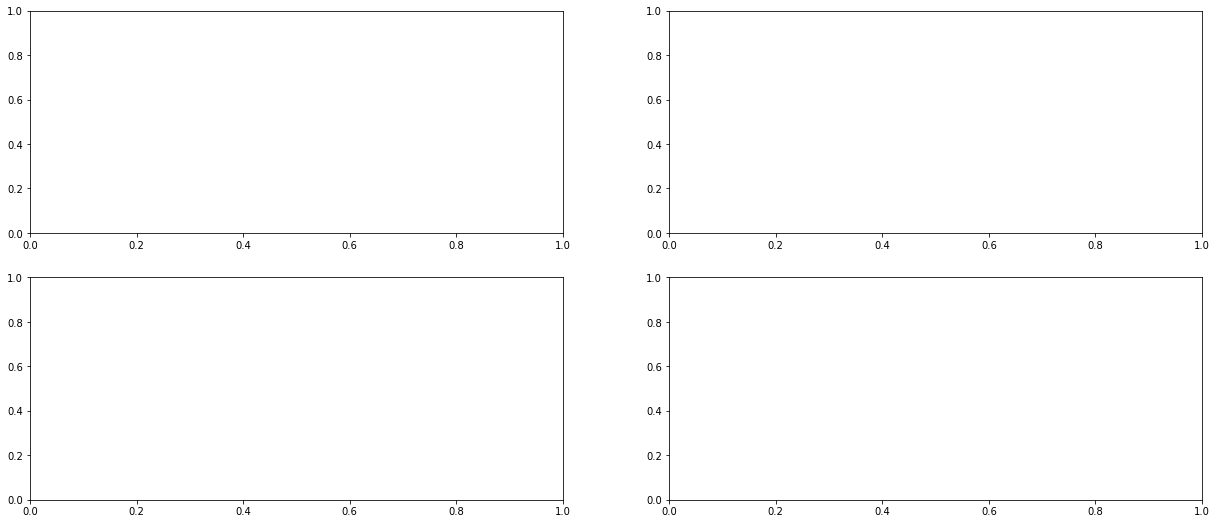

In [12]:
mpl.show_object_id_by_date(df_london, return_fig=False)

In [3]:
#move_df = df_london
move_df = pm.read_csv("geolife_sample.csv", encoding= 'unicode_escape')

In [3]:
move_df

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1
...,...,...,...,...
217648,39.999896,116.327290,2009-03-19 05:46:02,5
217649,39.999899,116.327352,2009-03-19 05:46:07,5
217650,39.999945,116.327394,2009-03-19 05:46:12,5
217651,40.000015,116.327433,2009-03-19 05:46:17,5


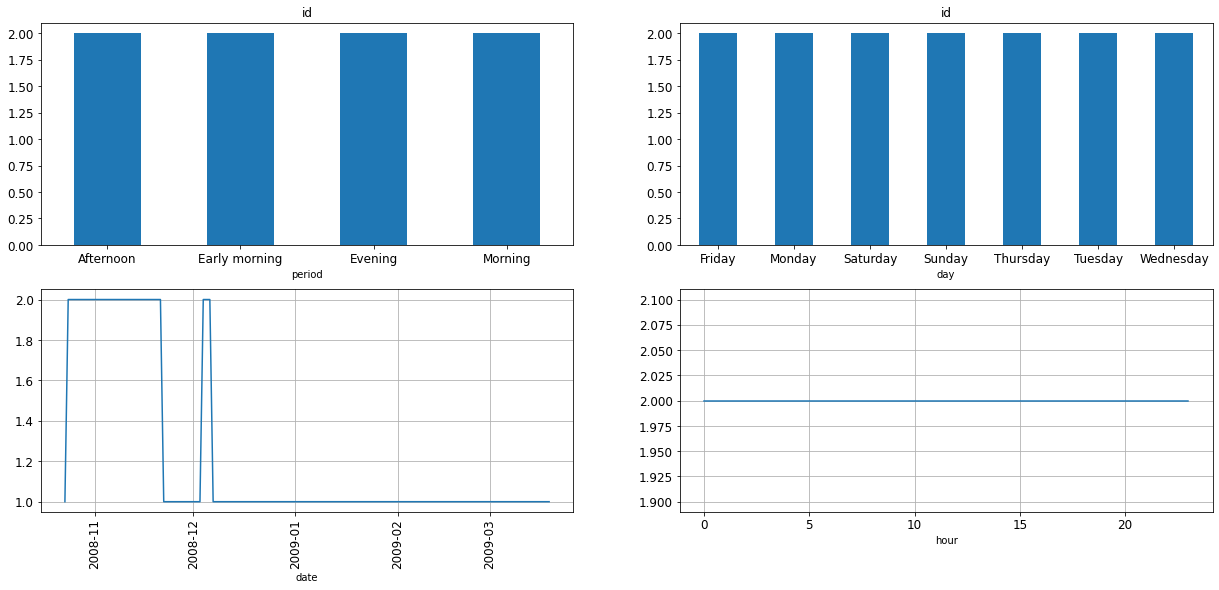

In [4]:
mpl.show_object_id_by_date(move_df, return_fig=False)

In [4]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [5]:
def colour_ge_value(value, comparison):
    if value >= comparison:
        return 'color: red'
    else:
        return 'color: black'

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
output = widgets.Output()
plot_output = widgets.Output()

dropdown_lat = widgets.Dropdown(options = unique_sorted_values_plus_ALL(move_df.lat), description = 'Lat:')
dropdown_lon = widgets.Dropdown(options = unique_sorted_values_plus_ALL(move_df.lon), description = 'Lon:')
bounded_id = widgets.BoundedFloatText(min=0, max=5, value=5, step=1, description = 'ID:')


def common_filtering(lat, lon, id):
    output.clear_output()
    plot_output.clear_output()
    
    if (lat == ALL) & (lon == ALL):
        common_filter = move_df
    elif (lat == ALL):
        common_filter = move_df[move_df.lon == lon]
    elif (lon == ALL):
        common_filter = move_df[move_df.lat == lat]
    else:
        common_filter = move_df[(move_df.id == id) & (move_df.lon == lon)]
    
    with output:
        display(common_filter.style.applymap(lambda x: colour_ge_value(x, num),subset=['Visits (000s)','Spend (£m)', 'Nights (000s)']))
    with plot_output:
        sns.kdeplot(common_filter['Visits (000s)'], shade=True)
        plt.show()

def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_lon.value,
                     bounded_id.value)
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_lat.value, change.new, 
                     bounded_id.value)
def bounded_num_eventhandler(change):
    common_filtering(dropdown_lat.value, dropdown_lon.value, change.new)


dropdown_lat.observe(dropdown_year_eventhandler, names='value')
dropdown_lon.observe(dropdown_purpose_eventhandler, names='value')
bounded_id.observe(bounded_num_eventhandler, names='value')

In [8]:
#display(dropdown_lat)
#display(dropdown_lon)
#display(bounded_id)

In [ ]:
output = widgets.Output()
plot_output = widgets.Output()

dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(move_df.lat), description = 'Year:')
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(move_df.lon), description = 'Purpose:')
bounded_num = widgets.BoundedFloatText(min=0, max=10, value=5, step=1, description = 'Number:')


def common_filtering(year, purpose, num):
    output.clear_output()
    plot_output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = move_df
    elif (year == ALL):
        common_filter = move_df[move_df.lon == purpose]
    elif (purpose == ALL):
        common_filter = move_df[move_df.lat == year]
    else:
        common_filter = move_df[(move_df.lat == year) & (move_df.lon == purpose)]
    
    with output:
        display(common_filter.style.applymap(lambda x: colour_ge_value(x, num),subset=['Visits (000s)','Spend (£m)', 'Nights (000s)']))
    with plot_output:
        sns.kdeplot(common_filter['Visits (000s)'], shade=True)
        plt.show()

def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value,
                     bounded_num.value)
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new, 
                     bounded_num.value)
def bounded_num_eventhandler(change):
    common_filtering(dropdown_year.value, dropdown_purpose.value, change.new)


dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')